In [ ]:
# Question 1
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVR

In [ ]:
print('----------------------------------------Question a----------------------------------------')
bh_train = pd.read_csv('bh_strat_train.csv')
print(bh_train.head(8))

----------------------------------------Question a----------------------------------------
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0   0.22438   0.0   9.69     0  0.585  6.027   79.7  2.4982   6.0  391.0   
1  24.39380   0.0  18.10     0  0.700  4.652  100.0  1.4672  24.0  666.0   
2   0.03768  80.0   1.52     0  0.404  7.274   38.3  7.3090   2.0  329.0   
3   1.65660   0.0  19.58     0  0.871  6.122   97.3  1.6180   5.0  403.0   
4   0.13117   0.0   8.56     0  0.520  6.127   85.2  2.1224   5.0  384.0   
5   0.02543  55.0   3.78     0  0.484  6.696   56.4  5.7321   5.0  370.0   
6   0.05083   0.0   5.19     0  0.515  6.316   38.1  6.4584   5.0  224.0   
7   0.20608  22.0   5.86     0  0.431  5.593   76.5  7.9549   7.0  330.0   

   PTRATIO  LSTAT  MEDV  
0     19.2  14.33  16.8  
1     20.2  28.28  10.5  
2     12.6   6.62  34.6  
3     14.7  14.10  21.5  
4     20.9  14.09  20.4  
5     17.6   7.18  23.9  
6     20.2   5.68  22.2  
7     19.1  12.5

In [ ]:
print(bh_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     430 non-null    float64
 1   ZN       430 non-null    float64
 2   INDUS    430 non-null    float64
 3   CHAS     430 non-null    int64  
 4   NOX      430 non-null    float64
 5   RM       430 non-null    float64
 6   AGE      430 non-null    float64
 7   DIS      430 non-null    float64
 8   RAD      430 non-null    float64
 9   TAX      430 non-null    float64
 10  PTRATIO  430 non-null    float64
 11  LSTAT    430 non-null    float64
 12  MEDV     430 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 43.8 KB
None


In [ ]:
# fix the CHAS column
bh_train = bh_train.astype({'CHAS' : 'category'}, copy=True)

In [ ]:
bh_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     430 non-null    float64 
 1   ZN       430 non-null    float64 
 2   INDUS    430 non-null    float64 
 3   CHAS     430 non-null    category
 4   NOX      430 non-null    float64 
 5   RM       430 non-null    float64 
 6   AGE      430 non-null    float64 
 7   DIS      430 non-null    float64 
 8   RAD      430 non-null    float64 
 9   TAX      430 non-null    float64 
 10  PTRATIO  430 non-null    float64 
 11  LSTAT    430 non-null    float64 
 12  MEDV     430 non-null    float64 
dtypes: category(1), float64(12)
memory usage: 41.0 KB


In [ ]:
# split data for X and y
X = bh_train.drop('MEDV', axis=1)
y = bh_train['MEDV']

In [ ]:
# question b
print('----------------------------------------Question b----------------------------------------')
# create a list for numerical features
num_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# numerical features pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # handle missing values
    ('scaler', MinMaxScaler())  # scale data
])

# Complete preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', OneHotEncoder(), ['CHAS'])  # OneHotEncoder for 'CHAS'
])

# apply preprocessing and fit
preprocessor.fit(X[num_features + ['CHAS']])
X_prep = preprocessor.fit_transform(X[num_features + ['CHAS']])


# transform to a df
column_names = num_features + ['CHAS_0', 'CHAS_1']  # update column names
X_prep_df = pd.DataFrame(X_prep, columns=column_names)

print('X_prep_df.head \n', X_prep_df.head(5))

----------------------------------------Question b----------------------------------------
X_prep_df.head 
        CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0  0.002451  0.000000  0.338343  0.411523  0.472504  0.790937  0.123864   
1  0.274109  0.000000  0.646628  0.648148  0.209044  1.000000  0.030047   
2  0.000352  0.842105  0.038856  0.039095  0.711439  0.364573  0.561627   
3  0.018549  0.000000  0.700880  1.000000  0.490707  0.972194  0.043769   
4  0.001403  0.000000  0.296921  0.277778  0.491665  0.847580  0.089667   

        RAD       TAX   PTRATIO     LSTAT  CHAS_0  CHAS_1  
0  0.217391  0.389313  0.702128  0.347682     1.0     0.0  
1  1.000000  0.914122  0.808511  0.732616     1.0     0.0  
2  0.043478  0.270992  0.000000  0.134934     1.0     0.0  
3  0.173913  0.412214  0.223404  0.341336     1.0     0.0  
4  0.173913  0.375954  0.882979  0.341060     1.0     0.0  


In [ ]:
# question c
print('----------------------------------------Question c----------------------------------------')
def ml_model(model, X, y, cv=5):
    '''
    Function that evaluates a model from sklearn.

    Parameters:
    - model: Machine learning model object (e.g., LinearRegression(), DecisionTreeRegressor(), etc.).
    - X: Feature matrix (numpy array or pandas DataFrame).
    - y: Target vector (numpy array or pandas Series).
    - cv: Number of cross-validation folds (default is 5).

    Returns:
    - rmse: Root mean squared error between predictions and actual labels.
    - cv_rmse_scores: Array of root mean squared error scores from cross-validation.
    '''
    # step 1: fit the model
    model.fit(X, y)

    # step 2: make predictions
    predictions = model.predict(X)

    # step 3: calculate rmse from predictions and actual labels
    rmse = np.sqrt(mean_squared_error(y, predictions))

    # step 4: perform cv
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    # convert negative MSE scores to positive values and find square root the mean squared error
    cv_rmse_scores = np.sqrt(-cv_scores)

    # step 5: print results
    print(f'model {model}')
    rmse = ('rmse-score:', rmse)
    cv_rmse_scores = ('cv-scores:', cv_rmse_scores)

    # return both the rmse and the cv rmse scores for further use if necessary
    return rmse, cv_rmse_scores

----------------------------------------Question c----------------------------------------


In [ ]:
# question d
print('----------------------------------------Question d----------------------------------------')
cv = 5

# (i) Linear Regression
model_lr = LinearRegression()
print(ml_model(model_lr, X_prep_df, y, cv))

# (ii) Decision Tree Regressor
model_dtr = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=20)
print(ml_model(model_dtr, X_prep_df, y, cv))

# (iii) Random Forest Regressor
model_rfr = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_leaf=2, min_samples_split=10)
print(ml_model(model_rfr, X_prep_df, y, cv))

# (iv) Linear SVR
model_lsvr = LinearSVR(C=1.0, max_iter=1000)
print(ml_model(model_lsvr, X_prep_df, y, cv))

# (v) SVR with Polynomial Kernel
model_svr_poly = SVR(kernel='poly', degree=3, C=10, epsilon=0.5)
print(ml_model(model_svr_poly, X_prep_df, y, cv))

----------------------------------------Question d----------------------------------------
model LinearRegression()
(('rmse-score:', 4.632460800140423), ('cv-scores:', array([5.15856647, 4.61833033, 5.52500035, 4.7366674 , 3.91275566])))
model DecisionTreeRegressor(max_depth=7, min_samples_split=20)
(('rmse-score:', 2.4487306516952425), ('cv-scores:', array([3.07568011, 3.97886323, 4.68041783, 3.54305885, 4.51401183])))
model RandomForestRegressor(min_samples_leaf=2, min_samples_split=10)
(('rmse-score:', 2.018127492862657), ('cv-scores:', array([3.99179778, 4.02945045, 3.87000316, 3.36793687, 2.93340836])))
model LinearSVR()
(('rmse-score:', 5.442024463546764), ('cv-scores:', array([6.09754135, 4.80954393, 7.13910361, 5.41986243, 4.69288815])))
model SVR(C=10, epsilon=0.5, kernel='poly')
(('rmse-score:', 3.224551002175687), ('cv-scores:', array([4.2125854 , 4.41585804, 4.76579799, 3.87186436, 3.01885844])))


In [ ]:
# question e
print('----------------------------------------Question e----------------------------------------')
# choose specific parameters RF
param_grid_rfr = {
    'n_estimators': [75, 100, 120],
    'max_depth': [20, 25, 30, None],
    'min_samples_split': [5, 10, 15],
}

# rin GSCV with RF
grid_search_rfr = GridSearchCV(RandomForestRegressor(), param_grid_rfr, cv=cv, scoring='neg_mean_squared_error')
grid_search_rfr.fit(X_prep_df, y)

print("Best parameters for Random Forest:", grid_search_rfr.best_params_)
# Evaluate model with ml_model function and best parameters
model_rfr_GS = RandomForestRegressor(**grid_search_rfr.best_params_)
print(ml_model(model_rfr_GS, X_prep_df, y, cv))

----------------------------------------Question e----------------------------------------
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 75}
model RandomForestRegressor(max_depth=30, min_samples_split=10, n_estimators=75)
(('rmse-score:', 1.8464757221330808), ('cv-scores:', array([3.62814877, 3.80597727, 3.94794149, 3.4152085 , 3.21272827])))


In [ ]:
# choose specific parameters SVR
param_grid_svr_poly = {
    'C': [0.5, 1, 2, 5, 10, 20, 100],
    'degree': [2, 3, 4],
    'epsilon': [0.01, 0.1, 0.5],
}

grid_search_svr_poly = GridSearchCV(SVR(kernel='poly'), param_grid_svr_poly, cv=cv, scoring='neg_mean_squared_error')
grid_search_svr_poly.fit(X_prep_df, y)

print("Best parameters for SVR POLY:", grid_search_svr_poly.best_params_)

model_SVR_GS = SVR(kernel='poly', **grid_search_svr_poly.best_params_)
print(ml_model(model_SVR_GS, X_prep_df, y, cv))

Best parameters for SVR POLY: {'C': 20, 'degree': 2, 'epsilon': 0.01}
model SVR(C=20, degree=2, epsilon=0.01, kernel='poly')
(('rmse-score:', 3.4435727534029144), ('cv-scores:', array([4.2989713 , 3.37601784, 4.73274057, 3.68367815, 3.11190516])))


In [ ]:
# question f
print('----------------------------------------Question f----------------------------------------')
bh_test = pd.read_csv('bh_strat_test.csv')
print(bh_test.head())

----------------------------------------Question f----------------------------------------
       CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
0   2.44668   0.0  19.58     0  0.8710  5.272  94.0  1.7364   5.0  403.0   
1  10.06230   0.0  18.10     0  0.5840  6.833  94.3  2.0882  24.0  666.0   
2   0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180   4.0  224.0   
3   0.03306   0.0   5.19     0  0.5150  6.059  37.3  4.8122   5.0  224.0   
4   8.64476   0.0  18.10     0  0.6930  6.193  92.6  1.7912  24.0  666.0   

   PTRATIO  LSTAT  MEDV  
0     14.7  16.14  13.1  
1     20.2  19.69  14.1  
2     14.7   2.88  50.0  
3     20.2   8.51  20.6  
4     20.2  15.17  13.8  


In [ ]:
print(bh_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     76 non-null     float64
 1   ZN       76 non-null     float64
 2   INDUS    76 non-null     float64
 3   CHAS     76 non-null     int64  
 4   NOX      76 non-null     float64
 5   RM       76 non-null     float64
 6   AGE      76 non-null     float64
 7   DIS      76 non-null     float64
 8   RAD      76 non-null     float64
 9   TAX      76 non-null     float64
 10  PTRATIO  76 non-null     float64
 11  LSTAT    76 non-null     float64
 12  MEDV     76 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 7.8 KB
None


In [ ]:
X_test = bh_test.drop('MEDV', axis=1)
y_test = bh_test['MEDV']

In [ ]:
# fix the CHAS column
bh_test = bh_test.astype({'CHAS' : 'category'}, copy=True)

In [ ]:
# preprocesing the test data
# list num columns
num_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# apply preprocessor
X_test_prep = preprocessor.transform(bh_test[num_features + ['CHAS']])

# Convert transformed data back into a DataFrame
column_names = num_features + ['CHAS_0', 'CHAS_1']  # Update column names depending on OneHotEncoder output
X_test_df = pd.DataFrame(X_test_prep, columns=column_names)

print('Processed test data preview:')
print(X_test_df.head(5))

Processed test data preview:
       CRIM   ZN     INDUS       NOX        RM       AGE       DIS       RAD  \
0  0.027429  0.0  0.700880  1.000000  0.327841  0.938208  0.054543  0.173913   
1  0.113027  0.0  0.646628  0.409465  0.626940  0.941298  0.086555  1.000000   
2  0.000155  1.0  0.081378  0.063992  0.857061  0.298661  0.362255  0.130435   
3  0.000301  0.0  0.173387  0.267490  0.478636  0.354274  0.334428  0.173913   
4  0.097094  0.0  0.646628  0.633745  0.504311  0.923790  0.059530  1.000000   

        TAX   PTRATIO     LSTAT  CHAS_0  CHAS_1  
0  0.412214  0.223404  0.397627     1.0     0.0  
1  0.914122  0.808511  0.495585     1.0     0.0  
2  0.070611  0.223404  0.031733     1.0     0.0  
3  0.070611  0.808511  0.187086     1.0     0.0  
4  0.914122  0.808511  0.370861     1.0     0.0  


In [ ]:
# predict with X test
y_test_pred_rfr = model_rfr_GS.predict(X_test_df)
y_test_pred_svr = model_svr_poly.predict(X_test_df)

# find rmse
rmse_test_rfr = np.sqrt(mean_squared_error(y_test, y_test_pred_rfr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))

# print scores
print(f'Random Forest Regressor - Test RMSE: {rmse_test_rfr}')
print(f'SVR with Polynomial Kernel - Test RMSE: {rmse_test_svr}')

Random Forest Regressor - Test RMSE: 3.47789228563854
SVR with Polynomial Kernel - Test RMSE: 4.08022773084555


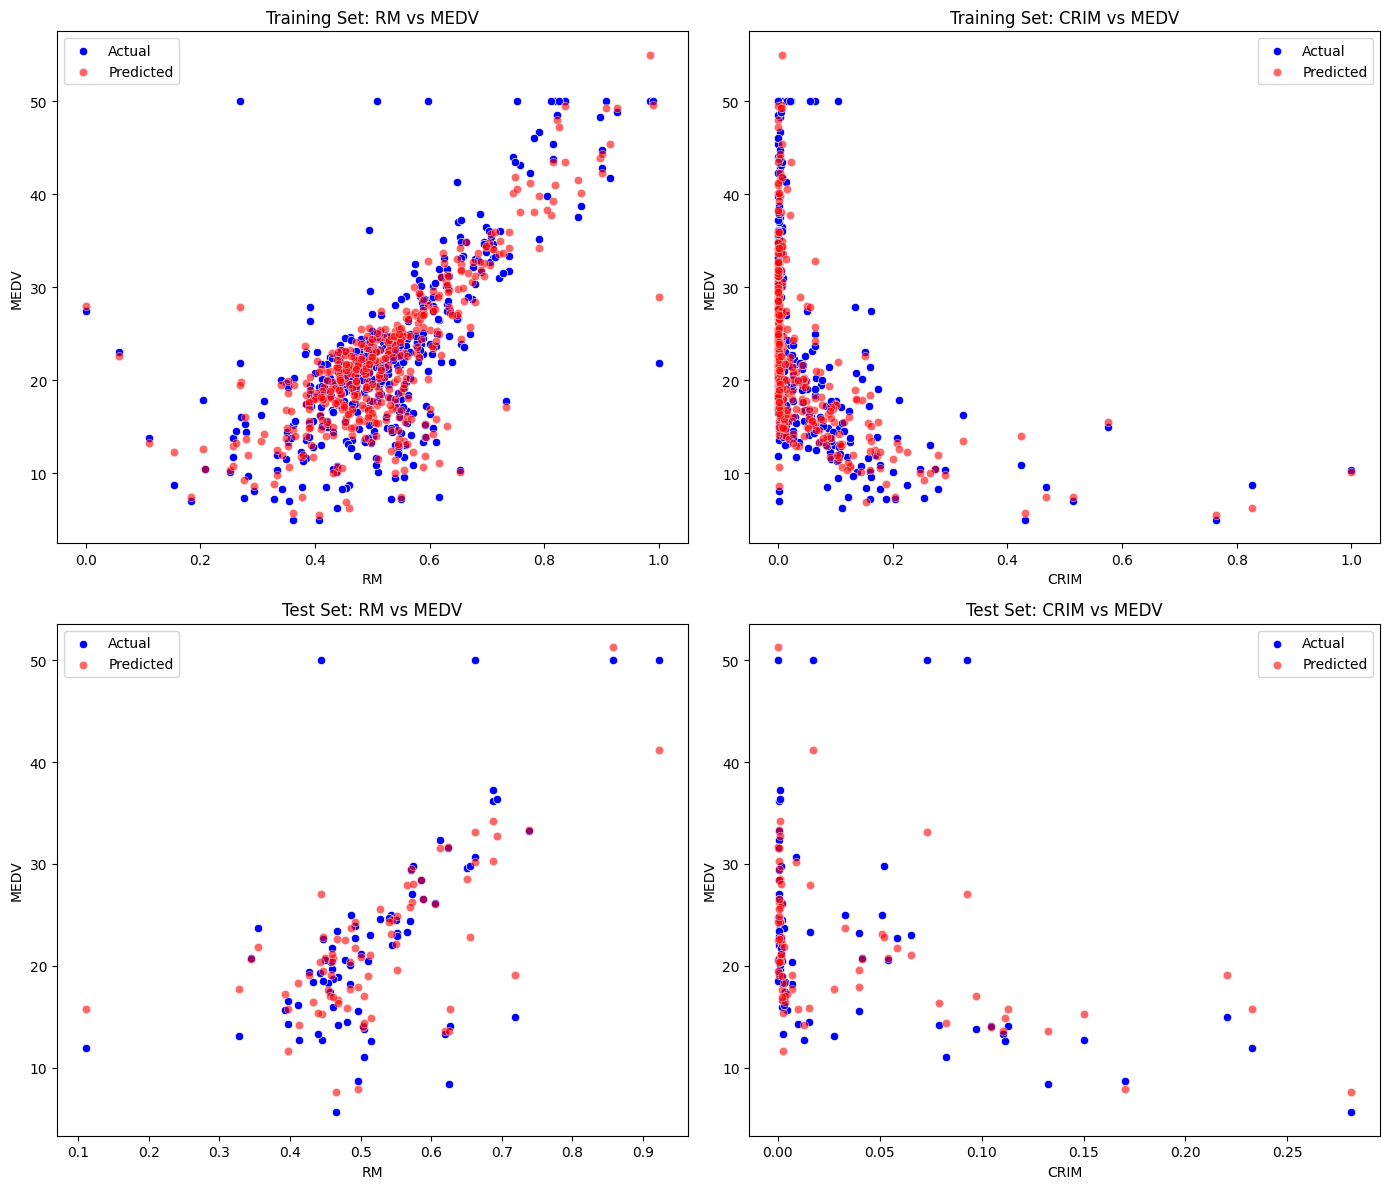

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


y_train_pred_svr = model_svr_poly.predict(X_prep_df)
# subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot a) RM vs. Training Labels and vs. Training Set Predictions
sns.scatterplot(ax=axs[0, 0], x=X_prep_df['RM'], y=y, color='blue', label='Actual')
sns.scatterplot(ax=axs[0, 0], x=X_prep_df['RM'], y=y_train_pred_svr, color='red', alpha=0.6, label='Predicted')
axs[0, 0].set_xlabel('RM')
axs[0, 0].set_ylabel('MEDV')
axs[0, 0].legend()
axs[0, 0].set_title('Training Set: RM vs MEDV')

# Plot b) CRIM vs. Training Labels and vs. Training Set Predictions
sns.scatterplot(ax=axs[0, 1], x=X_prep_df['CRIM'], y=y, color='blue', label='Actual')
sns.scatterplot(ax=axs[0, 1], x=X_prep_df['CRIM'], y=y_train_pred_svr, color='red', alpha=0.6, label='Predicted')
axs[0, 1].set_xlabel('CRIM')
axs[0, 1].set_ylabel('MEDV')
axs[0, 1].legend()
axs[0, 1].set_title('Training Set: CRIM vs MEDV')

# Plot c) RM vs. Test Labels and vs. Test Set Predictions
sns.scatterplot(ax=axs[1, 0], x=X_test_df['RM'], y=y_test, color='blue', label='Actual')
sns.scatterplot(ax=axs[1, 0], x=X_test_df['RM'], y=y_test_pred_svr, color='red', alpha=0.6, label='Predicted')
axs[1, 0].set_xlabel('RM')
axs[1, 0].set_ylabel('MEDV')
axs[1, 0].legend()
axs[1, 0].set_title('Test Set: RM vs MEDV')

# Plot d) CRIM vs. Test Labels and vs. Test Set Predictions
sns.scatterplot(ax=axs[1, 1], x=X_test_df['CRIM'], y=y_test, color='blue', label='Actual')
sns.scatterplot(ax=axs[1, 1], x=X_test_df['CRIM'], y=y_test_pred_svr, color='red', alpha=0.6, label='Predicted')
axs[1, 1].set_xlabel('CRIM')
axs[1, 1].set_ylabel('MEDV')
axs[1, 1].legend()
axs[1, 1].set_title('Test Set: CRIM vs MEDV')

plt.tight_layout()
plt.show()
